<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [3]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for min-dalle: filename=min_dalle-0.2.22-py3-none-any.whl size=11263 sha256=84726f3fdf87ac6ccf6731fefadcc29154efee2a26020b771dcd08d4724ccf01
  Stored in directory: /root/.cache/pip/wheels/7b/db/df/ec2e6cb890f0f527e178401b3f2fecaa7106748f2bdbc69bb9
Successfully built min-dalle
Mon Jul  4 21:23:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P10

### Load Model

In [4]:
from PIL import Image
from IPython.display import update_display
import numpy
from math import log2
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images
Note: reduce the grid size if you run out of GPU memory.  4x4 has been tested to work on T4 and P100 (with intermediate_image_count = 1)

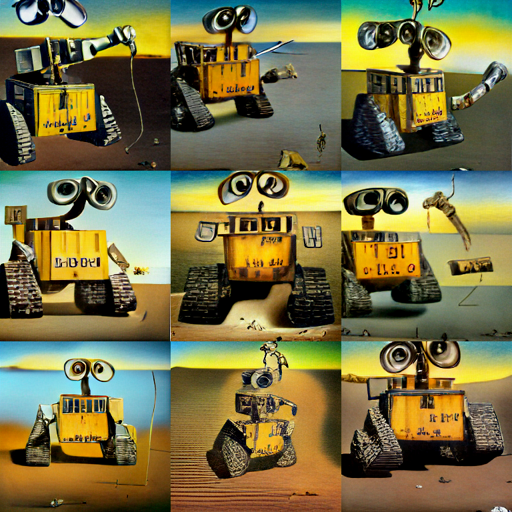

CPU times: user 33.9 s, sys: 551 ms, total: 34.4 s
Wall time: 35.3 s


In [5]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
grid_size = 3 #@param {type:"integer"}
seed = -1 #@param {type:"integer"}
intermediate_image_count = 8 #@param ["1", "2", "4", "8", "16"] {type:"raw"}
display_size = 512 #@param {type:"integer"}

image_shape = (display_size, display_size, 3)
zero_image = Image.fromarray(numpy.zeros(image_shape, dtype=numpy.uint8))
display(zero_image, display_id=1)

def handle_intermediate_image(row_index: int, image: Image.Image):
    image = image.resize((display_size, display_size))
    update_display(image, display_id=1)

image = model.generate_image(
    text,
    seed,
    grid_size,
    log2(intermediate_image_count),
    handle_intermediate_image
)